In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io
import time
start = time.time()

In [49]:
articles = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\articles.csv/articles.csv')
#users = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\customers.csv/customers.csv')
df = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\transactions_train.csv/transactions.csv', chunksize=100000)
users = next(df)

In [50]:
minimum_items = 2
groupby_customer = users.groupby('customer_id')

In [51]:
customer_prev_items = groupby_customer.get_group("00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2")['article_id']

In [52]:
customer_prev_items

2    505221004
3    685687003
4    685687004
5    685687001
6    505221001
Name: article_id, dtype: int64

In [53]:
users

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
99995,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,516859002,0.013542,1
99996,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,534357008,0.067780,1
99997,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,487722001,0.042356,1
99998,2018-09-22,398767f185a935edc17cc5db5a346ead3649b08be7b310...,684686001,0.050831,1


In [54]:
df = users.merge(articles, on='article_id')
df = df[['t_dat', 'customer_id', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc']]

In [55]:
feature_subset = ['product_group_name', 
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']

In [56]:
#Choose features to build feature space
features = feature_subset
df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)

In [57]:
dummies_df

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,38c4fd64a42108a4c821cabe4fd99f87f43981a924cfb6...,661351001,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,38d1ebd07fec370af9dff972572157516f4d7e49818dcf...,637028001,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,3915b86df4116d0ddbccfb88d49da8f627431c2120dafa...,623873001,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,3934131f5acca8b4aa2e036df4adf23c752e024e1d2495...,548837002,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [59]:
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')

In [60]:
normalized_user_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.000000,0.0,0.0,0.033333,0.033333,0.033333,0.0,0.0,0.0,0.0,...,0.0,0.033333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.100000,0.000000,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.060000,0.0,0.000000,0.0,0.000000,0.000000,0.0
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.000000,0.0,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.025000,0.000000,0.0
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.000000,0.0,0.0,0.050000,0.000000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.000000,0.0,0.0,0.000000,0.050000,0.050000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.000000,0.0,0.0,0.000000,0.040000,0.060000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.020000,0.0,0.000000,0.000000,0.0
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.000000,0.0,0.0,0.000000,0.020000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.020000,0.0,0.000000,0.0,0.080000,0.000000,0.0


In [61]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')

In [62]:
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
article_id,,,,,,,,,,,,,,,,,,,,,
663713001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
541518023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
505221004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685687003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
685687004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661351001,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637028001,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623873001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
scores = normalized_user_feature.dot(item_feature.T)

In [64]:
scores

article_id,663713001,541518023,505221004,685687003,685687004,685687001,505221001,688873012,501323011,598859003,...,327821026,661929001,466381012,714429001,641228003,661351001,637028001,623873001,548837002,538977001
customer_id,,,,,,,,,,,,,,,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.166667,0.100000,0.233333,0.166667,0.20,0.200000,0.233333,0.200000,0.233333,0.166667,...,0.033333,0.233333,0.133333,0.200,0.366667,0.233333,0.233333,0.033333,0.166667,0.100000
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.800000,0.800000,0.050000,0.150000,0.15,0.150000,0.000000,0.150000,0.350000,0.250000,...,0.000000,0.000000,0.350000,0.100,0.150000,0.050000,0.000000,0.150000,0.050000,0.050000
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.100000,0.100000,0.520000,0.600000,0.58,0.580000,0.480000,0.220000,0.160000,0.160000,...,0.000000,0.180000,0.040000,0.100,0.080000,0.100000,0.180000,0.040000,0.080000,0.260000
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.275000,0.125000,0.325000,0.150000,0.30,0.250000,0.325000,0.150000,0.275000,0.225000,...,0.000000,0.325000,0.225000,0.225,0.300000,0.150000,0.325000,0.075000,0.150000,0.175000
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.150000,0.200000,0.050000,0.200000,0.20,0.200000,0.050000,0.300000,0.200000,0.200000,...,0.000000,0.100000,0.350000,0.150,0.250000,0.150000,0.200000,0.150000,0.100000,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff0ac18093a702a0a06f4cc76582632df3ede9a36556e345150befbeed6885a,0.450000,0.150000,0.050000,0.350000,0.45,0.450000,0.050000,0.350000,0.600000,0.400000,...,0.100000,0.100000,0.400000,0.050,0.050000,0.000000,0.100000,0.050000,0.000000,0.050000
fff15526121f7d914a54784e68761a1d30b7547e3555738dcceb386eaaa24c4b,0.160000,0.060000,0.320000,0.120000,0.18,0.220000,0.320000,0.100000,0.240000,0.200000,...,0.100000,0.380000,0.200000,0.200,0.220000,0.180000,0.300000,0.040000,0.160000,0.120000
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.760000,0.500000,0.000000,0.180000,0.28,0.280000,0.000000,0.120000,0.400000,0.440000,...,0.020000,0.000000,0.340000,0.080,0.080000,0.000000,0.000000,0.080000,0.000000,0.000000


In [65]:
df3 = pd.DataFrame( columns =['Client', 'Prediction'])

In [66]:
#création du tableau de prediction
for i in range(scores.shape[0]):
    cutomer_scores = scores.loc[scores.index[i]]
    customer_id=scores.index[i]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False).head(10)  
    B=(ordered.index).values
    C=B.tolist()
    df3.loc[i]=[scores.index[i],C]
    
df_reset=df3
df_reset.to_csv("Predictionhm.csv")

In [67]:
%%time
df_reset

Wall time: 0 ns


,Client,Prediction
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,"[638383002, 514865020, 631735001, 514865023, 6..."
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[471074012, 643702004, 594430007, 594430001, 6..."
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,"[537346020, 666448005, 685687002, 671505004, 6..."
3,0003abe64294e66a6310c3436fa9e5b754cc5603deef4f...,"[691872001, 555364003, 585754001, 506495009, 5..."
4,0004068f54dbe1c7054b23c615edc5f733a508ecc54930...,"[633870002, 568069001, 648968004, 617919011, 6..."
...,...,...
18720,fff0ac18093a702a0a06f4cc76582632df3ede9a36556e...,"[618800001, 613456001, 613460005, 652221003, 7..."
18721,fff15526121f7d914a54784e68761a1d30b7547e355573...,"[516656001, 380609021, 381187001, 474123003, 6..."
18722,fff3e75605ec575be9b95eda1e6557299e81bba12668d7...,"[666651012, 678260002, 611415003, 658852002, 6..."
18723,fff4b145d7469e023b147b0f8375c565b1be4394498779...,"[671515001, 680846001, 610354004, 671505002, 5..."


In [68]:
end = time.time()
print(end - start)

128.08936762809753


In [69]:
df_reset.to_csv('hhhhh.csv')

In [70]:
indices=pd.Series(df['customer_id'])
def achats(num):
    Liste=[]
    pos = np.where(np.array(indices) == num)[0]
    for k in pos:
        O=df.iloc[k]['article_id']
        Liste.append(O) 
    return Liste

In [71]:
liste_achats=pd.DataFrame(columns =['Client', 'Liste des achats'])
def Les_achats(df_reset):
    for j in range(df_reset.shape[0]):
        K=achats(df_reset.iloc[j]['Client'])
        liste_achats.loc[j]=[df_reset.iloc[j]['Client'],K]
    return liste_achats

In [72]:
%%time
liste_achats=Les_achats(df_reset)

Wall time: 2min 10s


In [73]:
liste_achats

,Client,Liste des achats
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,"[640244003, 583558001, 639677008]"
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[663713001, 541518023]"
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,"[505221004, 685687003, 685687004, 685687001, 5..."
3,0003abe64294e66a6310c3436fa9e5b754cc5603deef4f...,"[591334019, 501820008, 543054005, 640174004]"
4,0004068f54dbe1c7054b23c615edc5f733a508ecc54930...,"[658183002, 625480003]"
...,...,...
18720,fff0ac18093a702a0a06f4cc76582632df3ede9a36556e...,"[665095002, 639685006]"
18721,fff15526121f7d914a54784e68761a1d30b7547e355573...,"[532578008, 642499001, 440811006, 485973011, 5..."
18722,fff3e75605ec575be9b95eda1e6557299e81bba12668d7...,"[679121002, 671513003, 680186002, 638642002, 6..."
18723,fff4b145d7469e023b147b0f8375c565b1be4394498779...,"[685687002, 562245059, 189691033]"


In [74]:
liste_achats.to_csv('2.csv')

In [75]:
indices7=pd.Series(articles['article_id'])
indices1 = pd.Series(liste_achats.index, index=liste_achats['Client']).drop_duplicates()
le_df=pd.DataFrame(columns=articles.columns)
def construction_achete(clientid,le_df): 
    idx = indices1[clientid]
    LI=liste_achats.loc[idx]["Liste des achats"]
    for l in LI:
        indexa=indices7[indices7 == l].index[0]
        h=indexa
        O = articles.loc[h]
        le_df=le_df.append(O)
    return le_df.T

In [76]:
%%time
leeeee=construction_achete("0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa",le_df)

Wall time: 24 ms


In [77]:
leeeee

,33991,19333,33748
article_id,640244003,583558001,639677008
product_code,640244,583558,639677
prod_name,CORY CORD SKIRT,Noel denim dress,Portofino ISW 28
product_type_no,275,265,259
product_type_name,Skirt,Dress,Shirt
product_group_name,Garment Lower body,Garment Full body,Garment Upper body
graphical_appearance_no,1010016,1010023,1010010
graphical_appearance_name,Solid,Denim,Melange
colour_group_code,9,72,71
colour_group_name,Black,Blue,Light Blue


In [78]:
leeeee.to_csv('3.csv')

In [79]:
le_df=pd.DataFrame( columns =['Articles achetés', 'Caractéristiques'])
indices2=pd.Series(articles['article_id'])
indices3=pd.Series(liste_achats.index, index=liste_achats['Client']).drop_duplicates()
Features_a_inclure = ['article_id','prod_name', 'index_name', 'section_name', 'product_group_name', 'product_type_name', 'garment_group_name', 'detail_desc', 'colour_group_name']
def construction_achete_df(clientid,le_df): 
    idx = indices3[clientid]
    LI=liste_achats.loc[idx]["Liste des achats"]
    for l in LI:
        index1=indices2[indices2 == l].index[0]
        h=index1
        O = articles.loc[h]
        C=articles[Features_a_inclure].iloc[h].values
        Z=[articles.iloc[index1].prod_name,C]
        D=LI.index(l)
        le_df.loc[D] = Z
    return le_df

In [80]:
df6=construction_achete_df("0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa",le_df)
df6

,Articles achetés,Caractéristiques
0,CORY CORD SKIRT,"[640244003, CORY CORD SKIRT, Divided, Divided ..."
1,Noel denim dress,"[583558001, Noel denim dress, Divided, Divided..."
2,Portofino ISW 28,"[639677008, Portofino ISW 28, Ladieswear, Wome..."


In [81]:
df6.to_csv('df6.csv')

In [82]:
indices4 = pd.Series(df_reset.index, index=df_reset['Client']).drop_duplicates()
indices8=pd.Series(articles['article_id'])
le_df2=pd.DataFrame(columns=articles.columns)
def construction_recommande(clientid,le_df2): 
    idx = indices4[clientid]
    LI=df_reset.loc[idx]["Prediction"]
    for l in LI:
        indexr=indices8[indices8 == l].index[0]
        h=indexr
        O = articles.loc[h]
        le_df2=le_df2.append(O)
    return le_df2.T

In [83]:
%%time
construction_recommande("0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa",le_df2)

Wall time: 74.8 ms


,33334,7510,31288,7511,36493,19317,28567,33703,34295,28569
article_id,638383002,514865020,631735001,514865023,650974002,583533002,623434008,639552001,641168001,623434011
product_code,638383,514865,631735,514865,650974,583533,623434,639552,641168,623434
prod_name,Dung pinafore W,CHARLIE A-LINE,ALLY PINAFORE,CHARLIE A-LINE,Alison dress W,Liam denim dress,Charlie A-line,KYLE SKIRT,Chicago Dress,Charlie A-line
product_type_no,265,275,275,275,265,265,275,275,265,275
product_type_name,Dress,Skirt,Skirt,Skirt,Dress,Dress,Skirt,Skirt,Dress,Skirt
product_group_name,Garment Full body,Garment Lower body,Garment Lower body,Garment Lower body,Garment Full body,Garment Full body,Garment Lower body,Garment Lower body,Garment Full body,Garment Lower body
graphical_appearance_no,1010023,1010023,1010023,1010023,1010016,1010023,1010023,1010023,1010016,1010016
graphical_appearance_name,Denim,Denim,Denim,Denim,Solid,Denim,Denim,Denim,Solid,Solid
colour_group_code,72,72,72,71,71,72,72,71,9,9
colour_group_name,Blue,Blue,Blue,Light Blue,Light Blue,Blue,Blue,Light Blue,Black,Black


In [84]:
le_df8=pd.DataFrame( columns =['Articles recommandé', 'Caractéristiques', 'Similarité'])
indices5 = pd.Series(df_reset.index, index=df_reset['Client']).drop_duplicates()
indices6=pd.Series(articles['article_id'])
Features_a_inclure = ['article_id','prod_name', 'index_name', 'section_name', 'product_group_name', 'product_type_name', 'garment_group_name', 'detail_desc', 'colour_group_name']
def construction_recommande_df(clientid,le_df): 
    idx = indices5[clientid]
    LI1=df_reset.loc[idx]["Prediction"]
    for l in LI1:
        index1=indices6[indices6 == l].index[0]
        cutomer_scores = scores.loc[clientid].sort_values(ascending=False)
        h=index1
        C=articles[Features_a_inclure].iloc[h].values
        O = [articles.iloc[h].prod_name,C,cutomer_scores[articles.iloc[h].article_id]]
        D=LI1.index(l)
        le_df8.loc[D] = O
    return le_df8

In [85]:
df9 = construction_recommande_df("0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa",le_df)
df9 

,Articles recommandé,Caractéristiques,Similarité
0,Dung pinafore W,"[638383002, Dung pinafore W, Divided, Divided ...",0.466667
1,CHARLIE A-LINE,"[514865020, CHARLIE A-LINE, Divided, Divided C...",0.466667
2,ALLY PINAFORE,"[631735001, ALLY PINAFORE, Divided, Divided Co...",0.466667
3,CHARLIE A-LINE,"[514865023, CHARLIE A-LINE, Divided, Divided C...",0.466667
4,Alison dress W,"[650974002, Alison dress W, Divided, Divided C...",0.466667
5,Liam denim dress,"[583533002, Liam denim dress, Divided, Divided...",0.466667
6,Charlie A-line,"[623434008, Charlie A-line, Divided, Divided C...",0.466667
7,KYLE SKIRT,"[639552001, KYLE SKIRT, Divided, Divided Colle...",0.466667
8,Chicago Dress,"[641168001, Chicago Dress, Divided, Divided Co...",0.433333
9,Charlie A-line,"[623434011, Charlie A-line, Divided, Divided C...",0.433333


In [86]:
df9.to_csv('df9.csv')

In [87]:
def get_rcmnd(customer_id, scores):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)  
    return ordered, customer_prev_items

In [88]:
def plot_prev(prev_items):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [89]:
def plot_rcmnd(rcmnds):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [90]:
k = 6
customer_id = scores.index[0]
rcmnds, prev_items = get_rcmnd(customer_id, scores)
rcmnds = rcmnds.index.values[:k]
path = "F:\images"

In [91]:
prev_items

7581     640244003
20318    583558001
75163    639677008
Name: article_id, dtype: int64

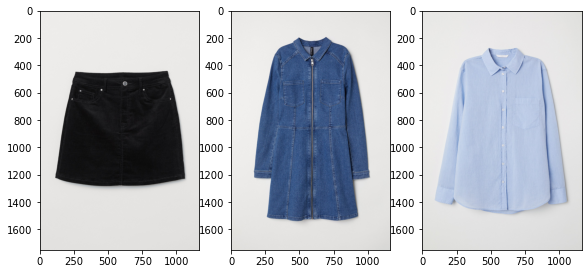

In [92]:
plot_prev(prev_items)

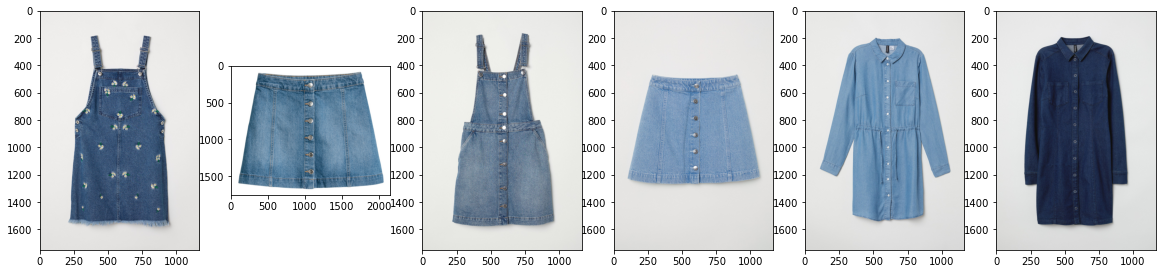

In [93]:
plot_rcmnd(rcmnds)

In [94]:
cutomer_scores = scores.loc["0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa"]
customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
prev_dropped = cutomer_scores.drop(customer_prev_items.values)
ordered = prev_dropped.sort_values(ascending=False) 

In [95]:
ordered.head(10)

article_id
638383002    0.466667
514865020    0.466667
631735001    0.466667
514865023    0.466667
650974002    0.466667
583533002    0.466667
623434008    0.466667
639552001    0.466667
641168001    0.433333
623434011    0.433333
Name: 0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa, dtype: float64

In [96]:
df9 = construction_recommande_df("0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa",le_df)
df9 

C:\Users\Stagiaire\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Articles recommandé,Caractéristiques,Similarité
0,Dung pinafore W,"[638383002, Dung pinafore W, Divided, Divided ...",0.466667
1,CHARLIE A-LINE,"[514865020, CHARLIE A-LINE, Divided, Divided C...",0.466667
2,ALLY PINAFORE,"[631735001, ALLY PINAFORE, Divided, Divided Co...",0.466667
3,CHARLIE A-LINE,"[514865023, CHARLIE A-LINE, Divided, Divided C...",0.466667
4,Alison dress W,"[650974002, Alison dress W, Divided, Divided C...",0.466667
5,Liam denim dress,"[583533002, Liam denim dress, Divided, Divided...",0.466667
6,Charlie A-line,"[623434008, Charlie A-line, Divided, Divided C...",0.466667
7,KYLE SKIRT,"[639552001, KYLE SKIRT, Divided, Divided Colle...",0.466667
8,Chicago Dress,"[641168001, Chicago Dress, Divided, Divided Co...",0.433333
9,Charlie A-line,"[623434011, Charlie A-line, Divided, Divided C...",0.433333
